In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import collections
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import math

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "./"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

Answers.csv
Data Statistics.ipynb
Id.ipynb
Questions Statistics.ipynb
Questions.csv
Tags statistics.ipynb
Tags.csv



In [2]:
questions = pd.read_csv("./Questions.csv", encoding='latin1')
answers = pd.read_csv("./Answers.csv", encoding='latin1')
tags = pd.read_csv("./Tags.csv", encoding='latin1')

In [3]:
ans_per_question = collections.Counter(answers['ParentId'])
answerid,noAnswers= zip(*ans_per_question.most_common())
text = "Avegrage number of answers per question ",np.mean(noAnswers)

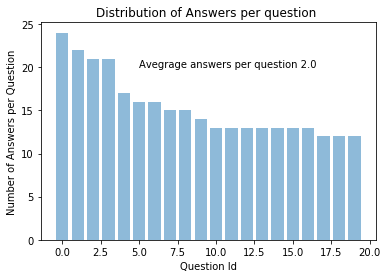

In [9]:
N=20
plt.bar(range(N), noAnswers[:N], align='center', alpha=0.5)
#plt.xticks(y_pos, objects)

plt.ylabel('Number of Answers per Question')
plt.xlabel('Question Id')
plt.title('Distribution of Answers per question ')
plt.text(5,20,"Avegrage answers per question "+str(math.ceil((np.mean(noAnswers)))))

plt.show()

In [12]:
def plot_tags(tagCount):
    
    x,y = zip(*tagCount)

    colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired  
    colors = [colormap(i) for i in np.linspace(0, 0.8,50)]   

    area = [i/400 for i in list(y)]   # 0 to 15 point radiuses
    plt.figure(figsize=(9,8))
    plt.ylabel("Number of question associations")
    for i in range(len(y)):
        plt.plot(i,y[i], marker='o', linestyle='',ms=area[i],label=x[i])

    plt.legend(numpoints=1)
    plt.show()

[(u'ggplot2', 13106), (u'dataframe', 8612), (u'plot', 7001), (u'shiny', 5274), (u'data.table', 4300), (u'matrix', 3722), (u'dplyr', 3402), (u'loops', 2435), (u'regex', 2380), (u'function', 2316)]


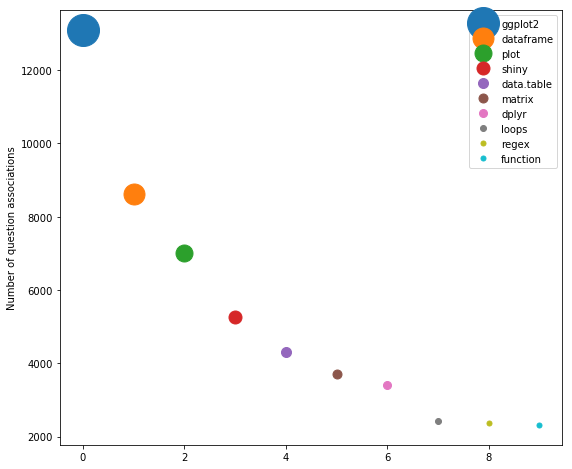

In [13]:
tagCount =  collections.Counter(list(tags['Tag'])).most_common(10)
print(tagCount)
plot_tags(tagCount)

In [14]:
topQuestions =list(zip(questions["Id"],questions["Score"],questions["Title"]))
topQuestions.sort(key=lambda x: x[1],reverse=True)
for id,s,t in topQuestions[:20]:
    #print("Question id:",id)
    print("Score :",s)
    print("Question Title\t:",t,'\n') 

('Score :', 1550)
('Question Title\t:', u'How to make a great R reproducible example?', '\n')
('Score :', 790)
('Question Title\t:', u'How to sort a dataframe by column(s)?', '\n')
('Score :', 657)
('Question Title\t:', u'R Grouping functions: sapply vs. lapply vs. apply. vs. tapply vs. by vs. aggregate', '\n')
('Score :', 579)
('Question Title\t:', u'How to join (merge) data frames (inner, outer, left, right)?', '\n')
('Score :', 484)
('Question Title\t:', u'How can we make xkcd style graphs?', '\n')
('Score :', 421)
('Question Title\t:', u'Drop data frame columns by name', '\n')
('Score :', 381)
('Question Title\t:', u'Remove rows with NAs (missing values) in data.frame', '\n')
('Score :', 354)
('Question Title\t:', u'Tricks to manage the available memory in an R session', '\n')
('Score :', 348)
('Question Title\t:', u'Quickly reading very large tables as dataframes in R', '\n')
('Score :', 344)
('Question Title\t:', u"data.table vs dplyr: can one do something well the other can't or